In [2]:
import networkx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ds_df = pd.read_csv('interactions_screenplay96.csv')

print(ds_df)

      Character     Listener  Interaction Count
0         ALICE         BILL                 70
1          BILL        ALICE                 80
2   BABY-SITTER        ALICE                  2
3         ALICE  BABY-SITTER                  1
4         ALICE       HELENA                  3
..          ...          ...                ...
84        CLERK         BILL                  5
85         BILL      ORDERLY                  2
86      ORDERLY         BILL                  1
87         BILL      UNKNOWN                  1
88      ZIEGLER      ZIEGLER                  1

[89 rows x 3 columns]


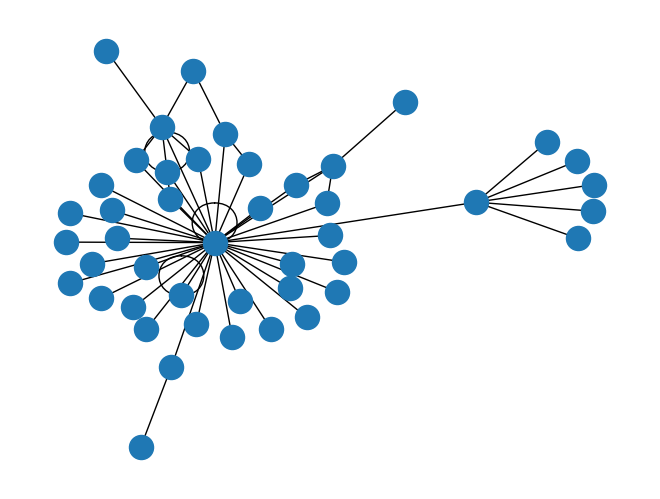

In [4]:
G = networkx.from_pandas_edgelist(ds_df, 'Character', 'Listener', 'Interaction Count')
networkx.write_graphml(G, 'DS-network.graphml')
networkx.draw(G)

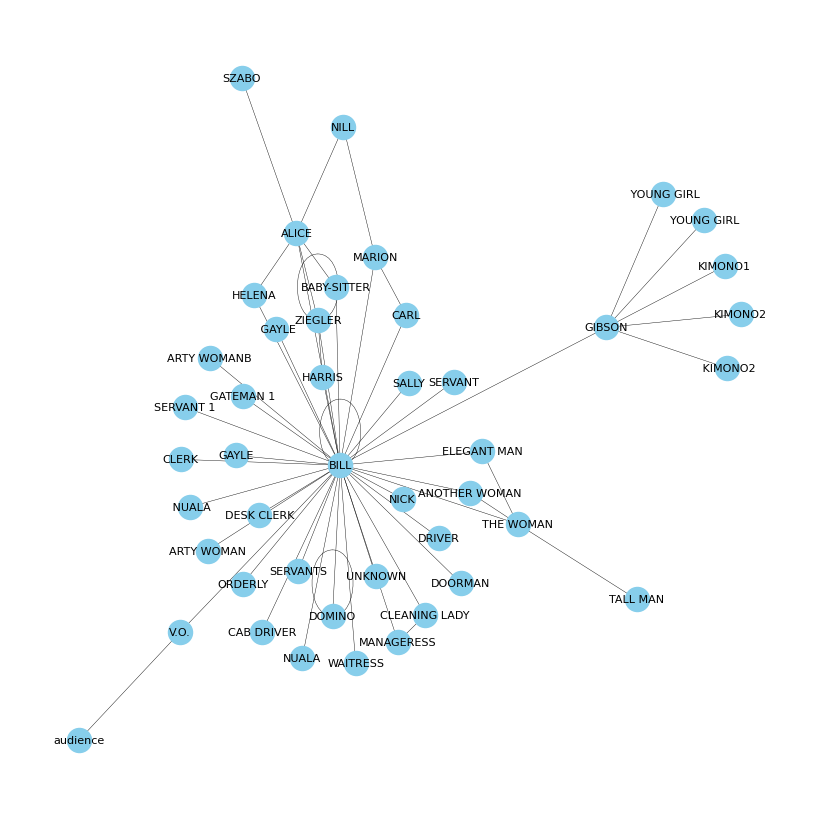

In [5]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

Who has the most number of connections in the network?

In [6]:
networkx.degree(G)

DegreeView({'ALICE': 6, 'BILL': 37, 'BABY-SITTER': 2, 'HELENA': 2, 'DOORMAN': 1, 'DRIVER': 1, 'ZIEGLER': 5, 'NICK': 1, 'SZABO': 1, 'GAYLE': 1, 'NUALA': 1, ' GAYLE': 1, ' NUALA': 1, 'HARRIS': 2, 'V.O.': 2, 'audience': 1, 'NILL': 2, 'MARION': 3, 'CARL': 2, 'DOMINO': 3, 'GIBSON': 6, 'KIMONO1': 1, ' KIMONO2': 1, 'KIMONO2': 1, 'YOUNG GIRL': 1, ' YOUNG GIRL': 1, 'CAB DRIVER': 1, 'GATEMAN 1': 1, 'SERVANTS': 1, 'SERVANT 1': 1, 'THE WOMAN': 4, 'ANOTHER WOMAN': 2, 'TALL MAN': 1, 'ELEGANT MAN': 2, 'CLEANING LADY': 2, 'MANAGERESS': 2, 'DESK CLERK': 1, 'SERVANT': 1, 'ARTY WOMANB': 1, 'ARTY WOMAN': 1, 'SALLY': 1, 'WAITRESS': 1, 'CLERK': 1, 'ORDERLY': 1, 'UNKNOWN': 1})

Make the degree values a dictionary, then add it as a network “attribute” with networkx.set_node_attributes()

In [7]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data G.nodes(data='degree'), then sort from highest to lowest

In [8]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
1,BILL,37
0,ALICE,6
20,GIBSON,6
6,ZIEGLER,5
30,THE WOMAN,4
19,DOMINO,3
17,MARION,3
35,MANAGERESS,2
31,ANOTHER WOMAN,2
33,ELEGANT MAN,2


Plot the nodes with the highest degree values

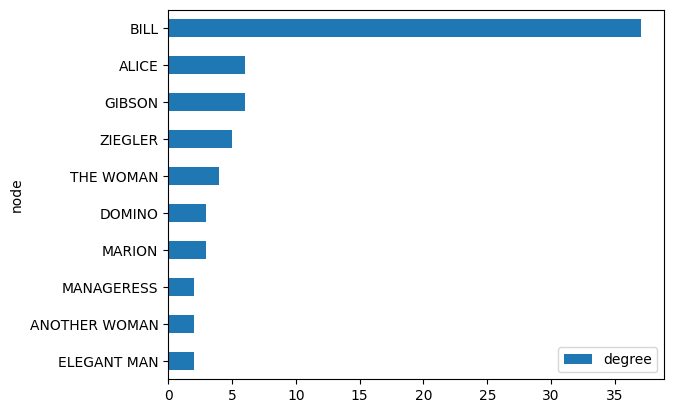

In [9]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()